# Examen final de Desarrollo de Aplicaciones para la Visualización de Datos

Nombre:

Apellidos:

Tiempo: 2 horas y 30 minutos

## Contexto del ejercicio

El Ayuntamiento de Madrid desea entender en más detalle la situación del problema habitacional en la ciudad de Madrid basada en múltiples fuentes de datos como alquiler vacacional, evolución del precio de alquiler, inflacción y densidad poblacional.

El objetivo del análisis es buscar patrones para entender mejor que está sucediendo, que barrios son los más estresados y que factores son que hacen que el precio de la vivienda esté en máximos. Por lo tanto, se pide:

1. Realizar un análisis descriptivo de los datos con al menos 6 visualizaciones diferentes. (3 Puntos)
2. Realizar un modelo de regresión lineal que explique (mostrar coeficientes) la dinámica del precio de la vivienda en base a los datos de alquiler vacacional a nivel agregado, no por barrio. (2 Puntos)
3. Montar un dashboard con 4 visualizaciones diferentes cómo mínimo. (2 Punto)
4. Concluir todo este análisis haciendo un informe con 2 páginas como mínimo que incluya, preguntas que se van a responder, dashboard resumen que sustente las preguntas y recomendaciones para mejorar la situación habitacional a partir de los resultados obtenidos de los análisis realizados con los datos. (3 Puntos)

## Juego de datos

Para realizar este análisis se provee un juego de datos con las siguientes variables:


| **Variable**           | **Descripción**                                                                                     | **Tipo**                 |
|-------------------------|-----------------------------------------------------------------------------------------------------|--------------------------|
| `neighbourhood_group`   | Grupo de vecindarios o distritos en Madrid.                                                        | Categórica               |
| `date`                 | Fecha de la observación en formato `YYYY-MM-DD`.                                                   | Temporal                 |
| `m2_price`             | Precio promedio por metro cuadrado en euros.                                                       | Cuantitativa continua     |
| `inflation`            | Inflación mensual como porcentaje (incremento en los precios al consumidor).                       | Cuantitativa continua     |
| `HICP`                 | Índice armonizado de precios al consumidor (indicador de inflación en la zona euro).               | Cuantitativa continua     |
| `population_density`   | Densidad de población anual por km² para toda la Comunidad de Madrid.                                                  | Cuantitativa continua     |
| `listings_count`       | Número total de propiedades listadas en Airbnb en un vecindario.                                   | Cuantitativa discreta     |
| `minimum_nights`       | Número mínimo de noches requerido para alquilar una propiedad.                                     | Cuantitativa discreta     |
| `nigth_price`          | Precio promedio por noche de las propiedades en Airbnb.                                            | Cuantitativa continua     |
| `availability_365`     | Número de días al año que una propiedad está disponible para alquilarse.                           | Cuantitativa discreta     |
| `listing_reviews`      | Número promedio de reseñas por propiedad listada.                                                 | Cuantitativa continua     |
| `number_of_reviews`    | Total acumulado de reseñas para todas las propiedades en un vecindario.                            | Cuantitativa discreta     |
| `reviews_per_month`    | Número promedio de reseñas recibidas por una propiedad al mes.                                     | Cuantitativa continua     |
| `hosts_count`          | Número de anfitriones activos en un vecindario.                                                   | Cuantitativa discreta     |
| `Private_room`         | Número de propiedades que ofrecen habitaciones privadas.                                           | Cuantitativa discreta     |
| `Entire_home`          | Número de propiedades que ofrecen viviendas completas.                                             | Cuantitativa discreta     |
| `Hotel_room`           | Número de propiedades categorizadas como habitaciones de hotel.                                    | Cuantitativa discreta     |
| `Shared_room`          | Número de propiedades que ofrecen habitaciones compartidas.                                        | Cuantitativa discreta     |


Ejemplos de preguntas que se pueden realizar a los datos:
1. ¿Cuál es el precio promedio del metro cuadrado (m2_price) por neighbourhood_group y cómo ha cambiado con el tiempo (date)?
2. ¿Existe una correlación entre el precio por metro cuadrado (m2_price) y la densidad de población (population_density)?
3. ¿Qué patrones estacionales se pueden identificar en las reseñas mensuales (reviews_per_month) o en la disponibilidad anual (availability_365)?
4. ¿Qué vecindarios tienen el mayor número de anfitriones (hosts_count) y cómo se relaciona con el precio de la vivienda?
5. ¿Qué vecindarios muestran el mayor crecimiento en precios (m2_price o nigth_price) entre años (year)?
6. ¿Qué factores (e.g., inflation, availability_365, population_density) explican mejor las variaciones en el precio por metro cuadrado (m2_price) o el precio por noche (nigth_price)?

Nota:
- Puedes hacer group_by para sacar variables agregadas por fecha.
- Se valorará la creatividad en las hipótesis, soluciones y limpieza del código y visualizaciones.

## Entrega del exámen

Compartir Url de github con:
- notebook que responde a las preguntas 1, 2 y 3
- PDF respondiendo a la pregunta 4

Puedes entregar el exámen en el siguiente enlace:

https://forms.gle/xe3En2raC3C3UUY39


# Librerías necesarias

In [151]:
import pandas as pd
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.cluster import DBSCAN, KMeans
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import (classification_report, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,
                            silhouette_score, r2_score)

# 1. Análisis descriptivos


In [53]:
df = pd.read_csv("housing_time_series_by_madrid_neighbourhood.csv")
df_og_model = pd.read_csv("housing_time_series_by_madrid_neighbourhood.csv")

In [3]:
#Confirmamos si hay o no algún NA --> NO HAY NAs
print(df.isna().sum())

neighbourhood_group    0
date                   0
m2_price               0
inflation              0
HICP                   0
population_density     0
listings_count         0
minimum_nights         0
nigth_price            0
availability_365       0
listing_reviews        0
number_of_reviews      0
reviews_per_month      0
hosts_count            0
Private_room           0
Entire_home            0
Hotel_room             0
Shared_room            0
dtype: int64


In [7]:
print("Types:{}".format(df.dtypes))

print("Unique values: {}".format(df.nunique()))

Types:neighbourhood_group     object
date                    object
m2_price               float64
inflation              float64
HICP                   float64
population_density       int64
listings_count           int64
minimum_nights         float64
nigth_price            float64
availability_365       float64
listing_reviews          int64
number_of_reviews      float64
reviews_per_month      float64
hosts_count              int64
Private_room             int64
Entire_home              int64
Hotel_room               int64
Shared_room              int64
dtype: object
Unique values: neighbourhood_group      18
date                    155
m2_price                286
inflation                31
HICP                     66
population_density       12
listings_count          388
minimum_nights         1464
nigth_price            1714
availability_365       1873
listing_reviews         651
number_of_reviews      1876
reviews_per_month      1892
hosts_count             324
Private_room   

In [8]:
#Vemos el formato de nuestros datos
print(df.head())

  neighbourhood_group        date  m2_price  inflation  HICP  \
0              Centro  2010-08-01      15.3        0.3   1.6   
1              Centro  2011-01-01      15.6       -0.7   3.0   
2              Centro  2011-02-01      15.4        0.1   3.4   
3              Centro  2011-05-01      15.0        0.0   3.4   
4              Centro  2011-06-01      15.0       -0.1   3.0   

   population_density  listings_count  minimum_nights  nigth_price  \
0                 796               1             2.0   114.000000   
1                 800               1             2.0   114.000000   
2                 800               4             7.0   184.000000   
3                 800               5             9.6    61.000000   
4                 800               5             5.4   135.333333   

   availability_365  listing_reviews  number_of_reviews  reviews_per_month  \
0            305.00                1              155.0             0.9000   
1            305.00                1  

-----

# 1. Análisis de gráficas

Ejemplos de preguntas que se pueden realizar a los datos:
1. ¿Cuál es el precio promedio del metro cuadrado (m2_price) por neighbourhood_group y cómo ha cambiado con el tiempo (date)? (hecha)
2. ¿Existe una correlación entre el precio por metro cuadrado (m2_price) y la densidad de población (population_density)? (hecha)
3. ¿Qué patrones estacionales se pueden identificar en las reseñas mensuales (reviews_per_month) o en la disponibilidad anual (availability_365)?
4. ¿Qué vecindarios tienen el mayor número de anfitriones (hosts_count) y cómo se relaciona con el precio de la vivienda? (ID del mayor número de anfitriones)
5. ¿Qué vecindarios muestran el mayor crecimiento en precios (m2_price o nigth_price) entre años (year)?
6. ¿Qué factores (e.g., inflation, availability_365, population_density) explican mejor las variaciones en el precio por metro cuadrado (m2_price) o el precio por noche (nigth_price)? (hechas AVAILABILITY y HICP) [2]

1 . **EVOLUCIÓN A LO LARGO DEL TIEMPO DEL PRECIO PROMEDIO DEL METRO CUADRADO POR VECINDARIO**

In [139]:
#Agrupamos por barrio y fecha para obtener la evolución de cada vecindario
avg_price_per_neigh = df.groupby(['date', 'neighbourhood_group'])['m2_price'].mean().reset_index()
print(avg_price_per_neigh)


           date neighbourhood_group  m2_price
0    2010-08-01              Centro     15.30
1    2011-01-01              Centro     15.60
2    2011-02-01              Centro     15.40
3    2011-05-01              Centro     15.00
4    2011-06-01              Centro     15.00
...         ...                 ...       ...
2213 2023-12-01              Tetuán     18.46
2214 2023-12-01               Usera     14.29
2215 2023-12-01           Vicálvaro     12.59
2216 2023-12-01   Villa de Vallecas     13.35
2217 2023-12-01          Villaverde     12.93

[2218 rows x 3 columns]


In [182]:
fig1 = px.line(
    avg_price_per_neigh,
    x='date',
    y='m2_price',
    color='neighbourhood_group',
    title="Evolución del precio promedio del m2 por vecindario"
)

fig1.update_layout(
    xaxis_title="Fecha",
    yaxis_title="Precio medio por m2"
)

fig1.show()

**2. CORRELACIONES TOTALES**

                    m2_price  inflation      HICP  population_density  \
m2_price            1.000000   0.049589  0.233299            0.471367   
inflation           0.049589   1.000000  0.281786            0.136025   
HICP                0.233299   0.281786  1.000000            0.520256   
population_density  0.471367   0.136025  0.520256            1.000000   
listings_count      0.444429   0.035163  0.170497            0.241597   
minimum_nights     -0.153499  -0.053845 -0.118673           -0.149692   
nigth_price         0.347200  -0.011975  0.004054            0.073220   
availability_365    0.063401   0.030185  0.107622            0.162690   
listing_reviews     0.418026   0.040288  0.161551            0.223445   
number_of_reviews  -0.025598  -0.062931 -0.191204           -0.267660   
reviews_per_month   0.241542   0.047464  0.190981            0.416094   
hosts_count         0.492247   0.035912  0.179141            0.261975   
Private_room        0.480942   0.048978  0.242761  

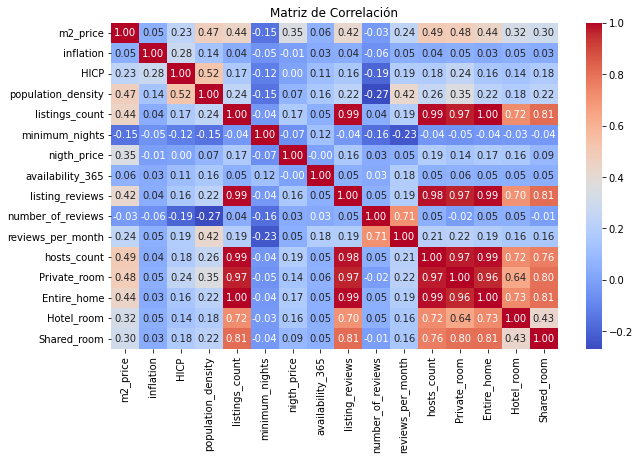

In [22]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_columns.corr()
print(corr_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

**2. CORRELACIÓN ENTRE DENSIDAD DE POBLACIÓN Y PRECIO POR M2**

In [143]:
fig2 = px.scatter(
    df,
    x='population_density',
    y='m2_price',
    title="Correlación entre densidad de población y precio por m2",
    color='neighbourhood_group'
    
)
fig2.update_layout(
    xaxis_title="Densidad de población",
    yaxis_title="Precio por m2",    
)
fig2.show()

**3. PRECIO POR NOCHE SEGÚN TIPO DE LISTING**

In [29]:
listing_columns = ['Private_room', 'Entire_home', 'Hotel_room', 'Shared_room']

avg_price_per_listing = df[listing_columns].multiply(df['nigth_price'], axis=0).sum() / df[listing_columns].sum()

avg_price_listing = avg_price_per_listing.reset_index()
avg_price_listing.columns = ['listing_type', 'avg_night_price']

fig = px.bar(
    avg_price_listing,
    x='listing_type',
    y='avg_night_price',
    title="Precio medio por noche según Tipo de Listing",
)

fig.update_layout(
    xaxis_title="Tipo de listing",
    yaxis_title="Precio por noche",    
)

fig.show()


**3. EVOLUCIÓN NÚMERO ANFITRIONES ACTIVOS POR BARRIO EN EL MOMENTO**

In [144]:
sum_hosts_per_neigh = df.groupby(['date', 'neighbourhood_group'])['hosts_count'].sum().reset_index()

fig3 = px.line(
    sum_hosts_per_neigh,
    x='date',
    y='hosts_count',
    color='neighbourhood_group',
    title="Evolución del número de anfitriones activos por vecindario"
)

fig3.update_layout(
    xaxis_title="Fecha",
    yaxis_title="Número de anfitriones activos",
    legend_title="Vecindario"
)
fig3.show()


In [146]:
fig4 = px.scatter(
    df,
    x='m2_price',
    y='hosts_count',
    title="Relación entre número de anfitriones y precio por m2",
    color='neighbourhood_group'
    
)
fig4.update_layout(
    xaxis_title="Precio por m2",
    yaxis_title="Número de anfitriones activos",    
)
fig4.show()


Podemos ver que el barrio centro es el que MÁS hosts activos tiene es el distrito centro (MUY TURÍSTICO)
Además, podemos observar también cómo le afecto significativamente el COVID en el 2020 pro ha sido el que más rápido ha recuperado sus niveles pre-pandemia.

**4. EVOLUCIÓN DE LA INFLACIÓN Y EL PRECIO M2**

In [147]:
df['date'] = pd.to_datetime(df['date'])

monthly_data = df.groupby(df['date'].dt.to_period('M')).agg({
    'inflation': 'mean',
    'm2_price': 'mean'
}).reset_index()

monthly_data['date'] = monthly_data['date'].dt.to_timestamp()

fig5 = go.Figure()
fig5.add_trace(
    go.Scatter(
        x=monthly_data['date'],
        y=monthly_data['inflation'],
        mode='lines',
        name='Inflación'    )
)
fig5.add_trace(
    go.Scatter(
        x=monthly_data['date'],
        y=monthly_data['m2_price'],
        mode='lines',
        name='Precio por m2',
        yaxis="y2"
    )
)

fig5.update_layout(
    title="Evolución mensual de Inflación y Precio por m2",
    xaxis_title="Fecha",
    yaxis_title="Inflación",
    yaxis2=dict(
        title="Precio por m2",
        overlaying="y",
        side="right"
    ),
)

fig5.show()

**5. EVOLUCIÓN DEL AVAILABILITY Y EL PRECIO M2**

In [150]:
df['date'] = pd.to_datetime(df['date'])

monthly_data = df.groupby(df['date'].dt.to_period('M')).agg({
    'availability_365': 'mean',
    'nigth_price': 'mean'
}).reset_index()

monthly_data['date'] = monthly_data['date'].dt.to_timestamp()

fig6 = go.Figure()
fig6.add_trace(
    go.Scatter(
        x=monthly_data['date'],
        y=monthly_data['availability_365'],
        mode='lines',
        name='Disponibilidad Anual'    )
)
fig6.add_trace(
    go.Scatter(
        x=monthly_data['date'],
        y=monthly_data['nigth_price'],
        mode='lines',
        name='Precio por noche',
        yaxis="y2"
    )
)

fig6.update_layout(
    title="Evolución mensual de Disponibilidad Anual y Precio por noche",
    xaxis_title="Fecha",
    yaxis_title="Disponibilidad",
    yaxis2=dict(
        title="Precio por noche",
        overlaying="y",
        side="right"
    ),
)

fig6.show()

In [149]:
df['date'] = pd.to_datetime(df['date'])

monthly_data = df.groupby(df['date'].dt.to_period('M')).agg({
    'm2_price': 'mean',
    'nigth_price': 'mean'
}).reset_index()

monthly_data['date'] = monthly_data['date'].dt.to_timestamp()

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=monthly_data['date'],
        y=monthly_data['m2_price'],
        mode='lines',
        name='Precio por m2'    )
)
fig.add_trace(
    go.Scatter(
        x=monthly_data['date'],
        y=monthly_data['nigth_price'],
        mode='lines',
        name='Precio por noche',
        yaxis="y2"
    )
)

fig.update_layout(
    title="Evolución mensual de Precios por m2 y Precio por noche",
    xaxis_title="Fecha",
    yaxis_title="Precio por m2",
    yaxis2=dict(
        title="Precio por noche",
        overlaying="y",
        side="right"
    ),
)

fig.show()

**6. RELACIÓN ENTRE NOCHES MÍNIMAS PARA ALQUILER Y NÚMERO DE RESEÑAS**

In [188]:
#Quitamos algunos outliers de la visualización para verlo mejor
minimum_nights_df = df[df['minimum_nights'] <= 50]

fig = px.scatter(
    minimum_nights_df,
    x='minimum_nights',
    y='reviews_per_month',
    title="Noches mínimas de alquiler vs. Número de reseñas mensuales",
    trendline='ols',
)

fig.update_layout(
    xaxis_title="Noches mínimas (requisito)",
    yaxis_title="Reseñas por Mes"
)

fig.show()

---

2. Modelo de regresión lineal

In [175]:
df_features = df_og_model.copy()
print(df_features.columns)

Index(['neighbourhood_group', 'date', 'm2_price', 'inflation', 'HICP',
       'population_density', 'listings_count', 'minimum_nights', 'nigth_price',
       'availability_365', 'listing_reviews', 'number_of_reviews',
       'reviews_per_month', 'hosts_count', 'Private_room', 'Entire_home',
       'Hotel_room', 'Shared_room'],
      dtype='object')


In [176]:
df_features['date'] = pd.to_datetime(df_features['date'])

df_features['year'] = df_features['date'].dt.year
df_features['month'] = df_features['date'].dt.month
df_features['day'] = df_features['date'].dt.day

In [177]:
df_features = df_features.drop(columns = ['m2_price', 'neighbourhood_group','date'])

In [178]:
print(df_features.columns)

Index(['inflation', 'HICP', 'population_density', 'listings_count',
       'minimum_nights', 'nigth_price', 'availability_365', 'listing_reviews',
       'number_of_reviews', 'reviews_per_month', 'hosts_count', 'Private_room',
       'Entire_home', 'Hotel_room', 'Shared_room', 'year', 'month', 'day'],
      dtype='object')


In [179]:
y = df_og_model["m2_price"]
X = df_features

#Quitamos outliers
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

X_filtered = X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]
y_filtered = y.loc[X_filtered.index]

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

In [181]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)

variables = X.columns
coeficientes = model.coef_

coef_df = pd.DataFrame({
    "Variable": variables,
    "Coeficiente": coeficientes
})
print(coef_df.sort_values(by="Coeficiente", ascending=False))

Error Cuadrático Medio (MSE): 2.1603536170119746
Coeficiente de Determinación (R^2): 0.6431695191950052
              Variable  Coeficiente
0            inflation     0.200041
10         hosts_count     0.188080
4       minimum_nights     0.108352
2   population_density     0.087870
16               month     0.023069
12         Entire_home     0.016423
5          nigth_price     0.012934
8    number_of_reviews     0.009816
6     availability_365     0.004818
14         Shared_room     0.000000
13          Hotel_room     0.000000
17                 day     0.000000
7      listing_reviews    -0.010000
3       listings_count    -0.069718
1                 HICP    -0.076388
11        Private_room    -0.086141
15                year    -0.403773
9    reviews_per_month    -0.698815


In [167]:
fig = px.bar(
    coef_df,
    x="Coeficiente",
    y="Variable",
    title="Importancia de coeficientes",
)
fig.update_layout(
    xaxis_title="Importancia",
    yaxis_title="Variable"
)
fig.show()

----

dASHBOARD

In [ ]:
#Código de STACKOVERFLOW para hacer subplots: https://stackoverflow.com/questions/56727843/how-can-i-create-subplots-with-plotly-express
import dash_core_components as dcc
import plotly.express as px
import plotly.subplots as sp

# For as many traces that exist per Express figure, get the traces from each plot and store them in an array.
# This is essentially breaking down the Express fig into it's traces
figure1_traces = []
figure4_traces = []
figure5_traces = []
figure6_traces = []
for trace in range(len(fig1["data"])):
    figure1_traces.append(fig1["data"][trace])
for trace in range(len(fig4["data"])):
    figure4_traces.append(fig4["data"][trace])
for trace in range(len(fig5["data"])):
    figure5_traces.append(fig5["data"][trace])
for trace in range(len(fig6["data"])):
    figure6_traces.append(fig6["data"][trace])

#Create a 1x2 subplot
this_figure = sp.make_subplots(rows=2, cols=2) 

# Get the Express fig broken down as traces and add the traces to the proper plot within in the subplot
for traces in figure1_traces:
    this_figure.append_trace(traces, row=1, col=1)
for traces in figure4_traces:
    this_figure.append_trace(traces, row=1, col=2)
for traces in figure5_traces:
    this_figure.append_trace(traces, row=2, col=1)
for traces in figure6_traces:
    this_figure.append_trace(traces, row=2, col=2)


this_figure.show()